In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# read trainData
trainData = pd.read_csv("train.csv", index_col = 0)
trainData.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
# read testData
testData = pd.read_csv("test.csv")
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


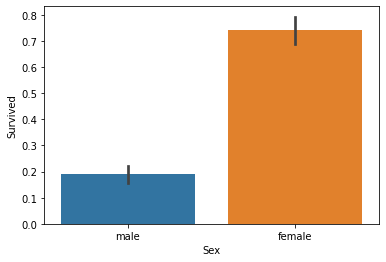

In [4]:
# bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data = trainData)

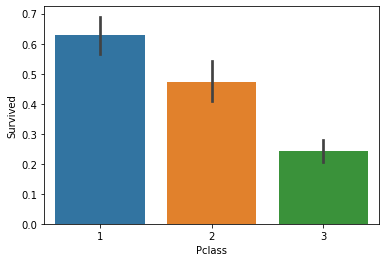

In [5]:
# bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data = trainData)

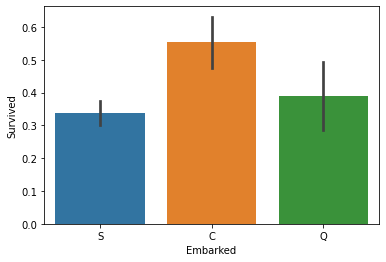

In [6]:
# bar plot of survival by Embarked
sns.barplot(x="Embarked", y="Survived", data = trainData)

In [7]:
#bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
#labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
#trainData['Age'] = pd.cut(trainData["Age"], bins, labels = labels)

# bar plot of survival by Age
#sns.barplot(x="Age", y="Survived", data=trainData)
#plt.show()

In [8]:
# trainData statistics
trainData.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# number of null enteries in trainData
trainData.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# filling null values in Age attribute with the mode
trainData['Age'] = trainData['Age'].fillna(trainData['Age'].mode()[0])

In [11]:
# checking the values of Cabin attribute 
trainData['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
D              3
              ..
C87            1
B101           1
A19            1
E63            1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [12]:
# There are not enough values as most of them are null so it is better to drop them
trainData.drop(columns = ['Cabin'],inplace = True)

In [13]:
# checking the values of Embarked attribute
trainData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# filling null values with the mode
trainData['Embarked'] = trainData['Embarked'].fillna(trainData['Embarked'].mode()[0])

In [15]:
# number of null entries in trainData to check that there is non
trainData.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
# number of null entries in testData
testData.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
# filling null values in Age attribute with the mode
testData['Age'] = testData['Age'].fillna(testData['Age'].mode()[0])

In [18]:
# checking the values of Cabin attribute 
testData['Cabin'].value_counts()

B57 B59 B63 B66    3
C6                 2
C89                2
C101               2
C116               2
                  ..
A21                1
C46                1
D28                1
E60                1
B51 B53 B55        1
Name: Cabin, Length: 76, dtype: int64

In [19]:
# There are not enough values as most of them are null so it is better to drop them
testData.drop(columns = ['Cabin'],inplace = True)

In [20]:
# filling null values in Fare attribute with the mode
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mode()[0])

In [21]:
# number of null entries in testData to check that there is non
testData.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
features = ['Sex', 'Age', 'Pclass', 'Parch', 'Embarked', 'SibSp']
x = pd.get_dummies(trainData[features]) 
y = trainData.Survived  

# splitting data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.33)
xtest = pd.get_dummies(testData[features])

# random forest model
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state=1)
model.fit(train_x, train_y)

model.score(test_x, test_y)

0.8

In [23]:
# cross validation using grid search
param_grid = { 
    'n_estimators': [200, 500, 300],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
modelcv = GridSearchCV(estimator=model, param_grid=param_grid, cv= 6)
modelcv.fit(x, y)

GridSearchCV(cv=6,
             estimator=RandomForestClassifier(max_depth=5, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500, 300]})

In [24]:
predictions = modelcv.predict(xtest)

output = pd.DataFrame({'PassengerId' : testData.PassengerId, 'Survived' : predictions})
output.to_csv('mySubmission.csv', index = False)
print('success')

success
